<a href="https://colab.research.google.com/github/ansarimaaz05/AI-CODE-EXPLAINER/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


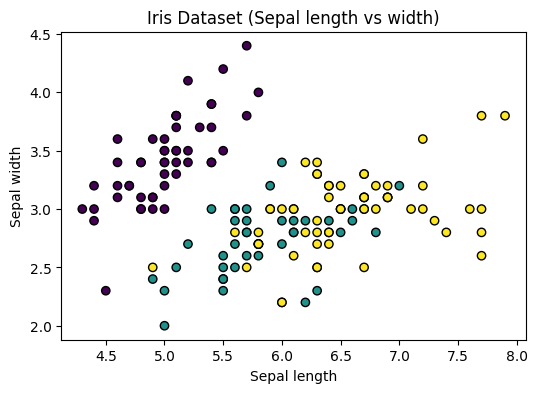

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy (Sigmoid): 0.90


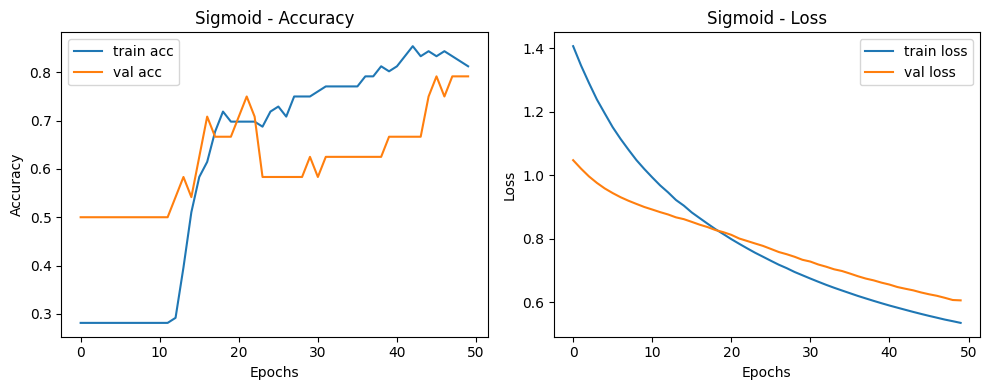

Test Accuracy (ReLU): 0.97


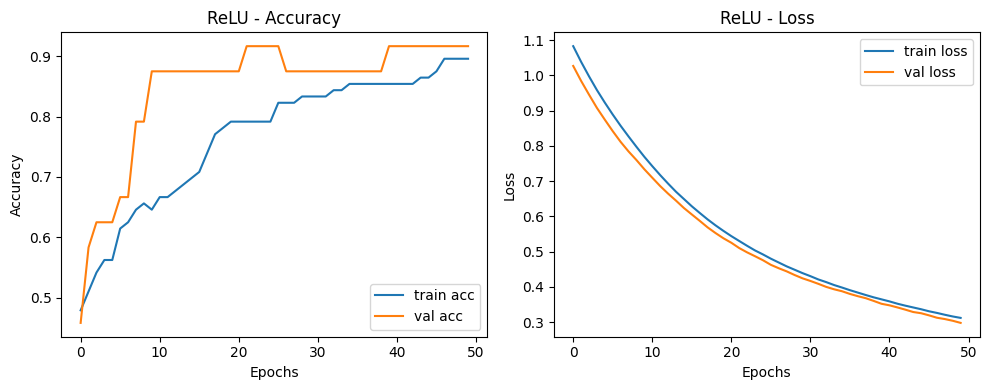

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction probabilities: [[0.9659196  0.02652607 0.00755426]]
Predicted class: setosa


In [ ]:
# =============================
# Deep Learning Assignment - Simple Perceptron
# Using Keras & TensorFlow in Google Colab
# =============================

# --- Step 1: Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- Step 2: Load & explore Iris dataset ---
iris = load_iris()
X, y = iris.data, iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("First 5 samples:\n", X[:5])

# Plot first two features just to visualize
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris Dataset (Sepal length vs width)")
plt.show()

# --- Step 3: Preprocess data ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = LabelBinarizer()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 4: Build Perceptron Model ---
def build_model(activation="sigmoid"):
    model = Sequential()
    model.add(Dense(10, input_shape=(4,), activation=activation))
    model.add(Dense(3, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Try with "sigmoid"
model_sigmoid = build_model("sigmoid")

# --- Step 5: Train model ---
history_sigmoid = model_sigmoid.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_split=0.2, verbose=0
)

# --- Step 6: Evaluate model ---
loss, acc = model_sigmoid.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Sigmoid): {acc:.2f}")

# --- Step 7: Plot training progress ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_sigmoid.history['accuracy'], label="train acc")
plt.plot(history_sigmoid.history['val_accuracy'], label="val acc")
plt.title("Sigmoid - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_sigmoid.history['loss'], label="train loss")
plt.plot(history_sigmoid.history['val_loss'], label="val loss")
plt.title("Sigmoid - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 8: Compare with ReLU ---
model_relu = build_model("relu")
history_relu = model_relu.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_split=0.2, verbose=0
)
loss, acc = model_relu.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (ReLU): {acc:.2f}")

# Plot ReLU results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_relu.history['accuracy'], label="train acc")
plt.plot(history_relu.history['val_accuracy'], label="val acc")
plt.title("ReLU - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_relu.history['loss'], label="train loss")
plt.plot(history_relu.history['val_loss'], label="val loss")
plt.title("ReLU - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 9: Test with a new sample ---
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example: Iris-Setosa
sample = scaler.transform(sample)
prediction = model_relu.predict(sample)
print("Prediction probabilities:", prediction)
print("Predicted class:", iris.target_names[np.argmax(prediction)])
